<a href="https://colab.research.google.com/github/Magaton1010/image-analysis/blob/main/skimage_watershed_kmean_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**skimage_segmentation_watershed_kmean models**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import median
from skimage.morphology import disk
from skimage import feature
from scipy.ndimage import distance_transform_edt
from skimage import measure

from skimage.segmentation import watershed
from scipy import ndimage as ndi
from sklearn.cluster import KMeans
import skimage.io
from skimage import data





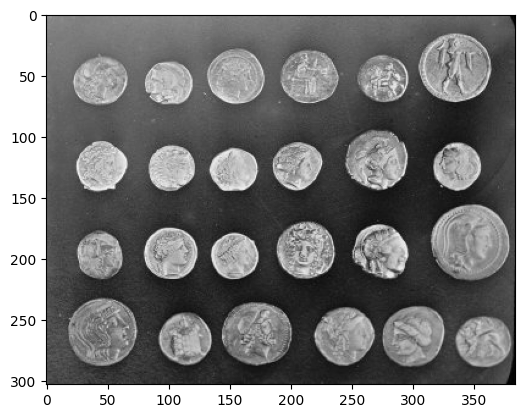

In [ ]:
#import data set
coins=data.coins()
plt.imshow(coins,cmap="gray")

In [ ]:
from skimage.filters import sobel
elevation_map = sobel(coins)
elevation_map

array([[0.22261811, 0.22580966, 0.04256528, ..., 0.01675295, 0.00765711,
        0.0202113 ],
       [0.22752914, 0.17208326, 0.04307036, ..., 0.03683979, 0.00765711,
        0.01180548],
       [0.10007686, 0.06139791, 0.02499519, ..., 0.084638  , 0.00490196,
        0.02018751],
       ...,
       [0.01386484, 0.03114192, 0.02949335, ..., 0.01669548, 0.00588235,
        0.00876889],
       [0.02752092, 0.04030354, 0.0335059 , ..., 0.00571662, 0.00980392,
        0.00438445],
       [0.02941176, 0.05787636, 0.0417099 , ..., 0.00490196, 0.00876889,
        0.00554594]])

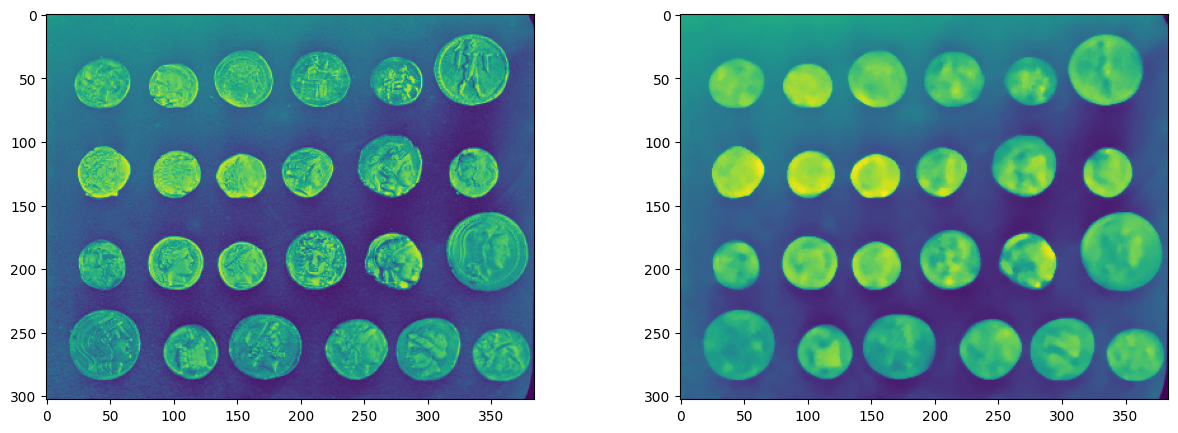

In [ ]:

coins_denoised = median (coins,disk(4))
f, (ax0,ax1)=plt .subplots(1,2, figsize=(15,5))
ax0.imshow(coins)
ax1.imshow(coins_denoised)

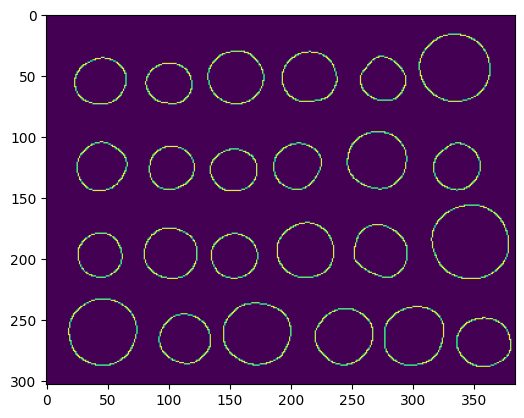

In [ ]:
edge_detection= feature.canny(coins_denoised,sigma=4)
plt.imshow(edge_detection)

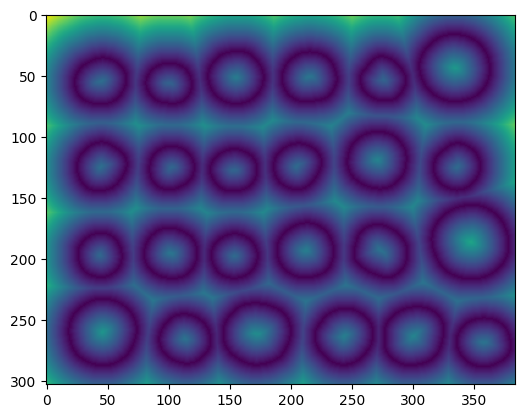

In [ ]:
distance=distance_transform_edt(~edge_detection)
plt.imshow(distance)

In [ ]:
peak_idxc = feature.peak_local_max(distance, min_distance=5)
peak_idxc[:5]

array([[186, 347],
       [ 44, 335],
       [260,  46],
       [ 91, 129],
       [ 90,  74]])

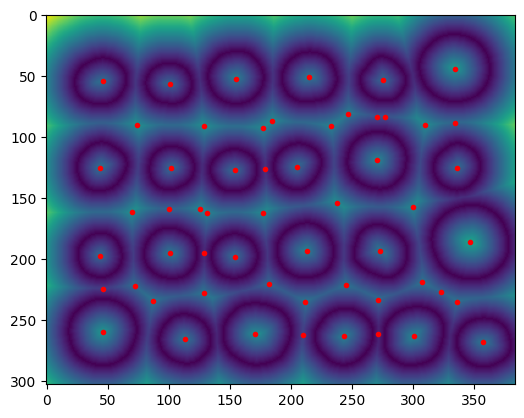

In [ ]:
plt.plot(peak_idxc[:,1],peak_idxc[:,0],'r.')
plt.imshow(distance)

In [ ]:
from skimage.feature import peak_local_max
local_max= peak_local_max(distance, footprint=np.ones((3, 3)),min_distance=5)
markers= measure.label(local_max)
markers[:5]

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [ ]:
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_max.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=coins)


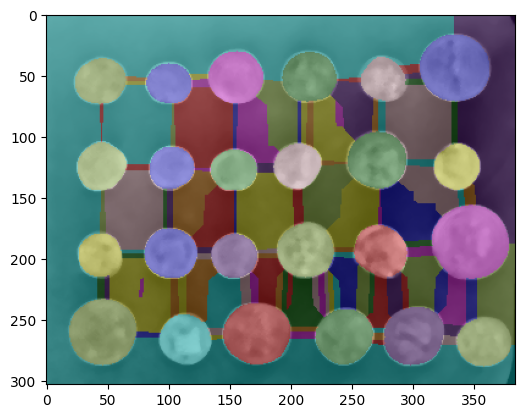

In [ ]:
from skimage.color import rgb2lab, lab2lch,label2rgb
plt.imshow(label2rgb(labels,image=coins_denoised ))

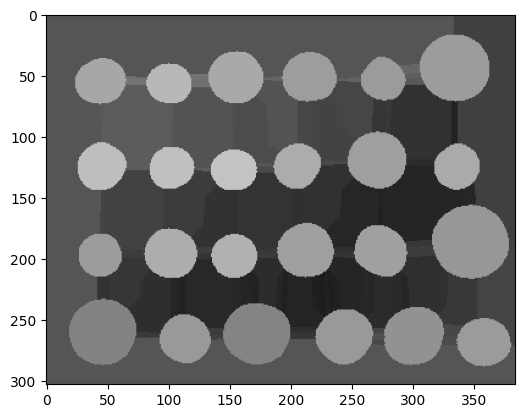

In [ ]:
plt.imshow(label2rgb(labels ,image=coins ,kind='avg'), cmap= 'gray')

(array([22., 13., 18., 16., 11.,  8.,  6.,  6.,  3.,  0.,  4.,  0.,  2.,
         0.,  4.,  8.,  2.,  4.,  1.,  3.]),
 array([ 29.96531792,  38.22767764,  46.49003737,  54.75239709,
         63.01475682,  71.27711654,  79.53947627,  87.80183599,
         96.06419572, 104.32655544, 112.58891517, 120.85127489,
        129.11363462, 137.37599434, 145.63835406, 153.90071379,
        162.16307351, 170.42543324, 178.68779296, 186.95015269,
        195.21251241]),
 <BarContainer object of 20 artists>)

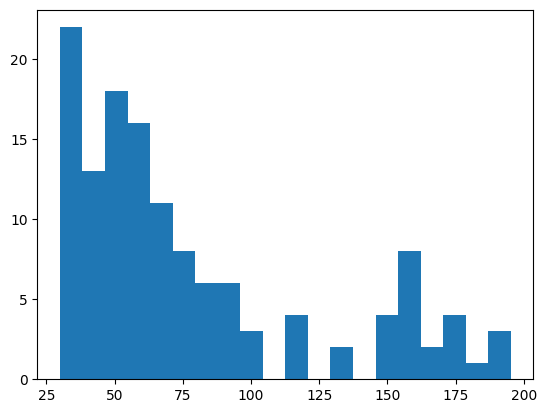

In [ ]:
regions= measure.regionprops(labels,intensity_image=coins)
region_means= [r.intensity_mean for r in regions]
plt.hist(region_means, bins=20)

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
region_means=np.array(region_means).reshape(-1,1)
model.fit(np.array(region_means))
print(model.cluster_centers_)

[[156.55326267]
 [ 56.87085561]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
bg_fg_labels=model.predict(region_means)
bg_fg_labels

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int32)

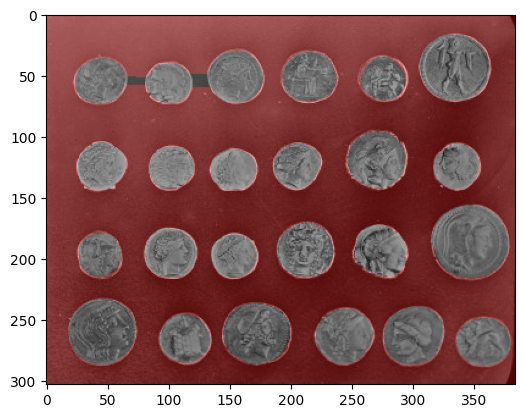

In [ ]:
classified_labels= labels.copy()
for bg_fg, region in  zip (bg_fg_labels,regions):
  classified_labels[tuple(region.coords.T)]= bg_fg
  plt.imshow(label2rgb(classified_labels, image =coins))

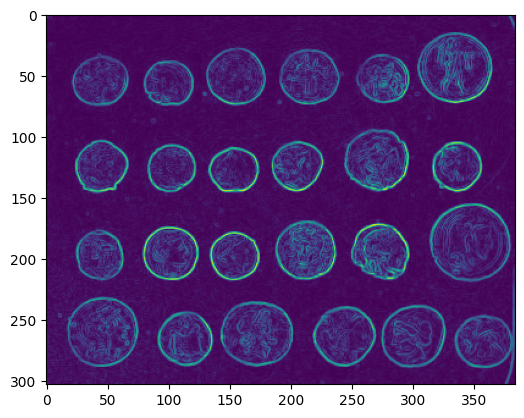

In [ ]:
from skimage.filters import sobel
elevation_map = sobel(coins)
plt.imshow(elevation_map)